# Tutorial: global_with_exf

### Written by M. Wood. June 2021

This verification experiment is almost identical to the global_with_exf experiment configured with the files in the `global_with_exf/input` directory, except that it uses `diagnostics_vec` to output variables from the model and compares them to variables from the `diagnostics` package to show that the two packages are identical.

The `global_with_exf` experiment provides a demonstration of a configuration that utilizes the `exf` package. In particular, the model implements a number of external forcing parameters including heat and salt fluxes, wind stress, and climatological sea surface temperature and salinity. Here, we demonstrate that the `diagnostics_vec` package can be used to output these variables from simulations in 2D surface grids.

This tutorial follows 5 steps:
1. Prepare the configuration
2. Prepare the diagnostic_vec masks
3. Build the model
4. Run the model
5. Compare diagnostics_vec vs diagnostics_output


### 1. Prepare the configuration
To prepare the configuration, `cd` to the `input_dv` directory within the `global_with_exf`  experiment. As for the code in the base experiment `input` directory, we provide a **prepare_run** script which can be used to generate all of the necessary files (aside from the few already provided). Run this from the command line, e.g.:

### 2. Prepare the diagnostics_vec masks

The diagnostics_vec masks are generated using a simple Python script, `create_masks.py`, which is additionally provided in the input_dv directory. Create the masks (from within the input_dv directory) by running the script:

This script creates five masks - four which laterally bound a subdomain in the pacific ocean, and one which covers the entire surface of the subdomain. To view these masks relative to the model bathymetry, we can read and plot them as follows:

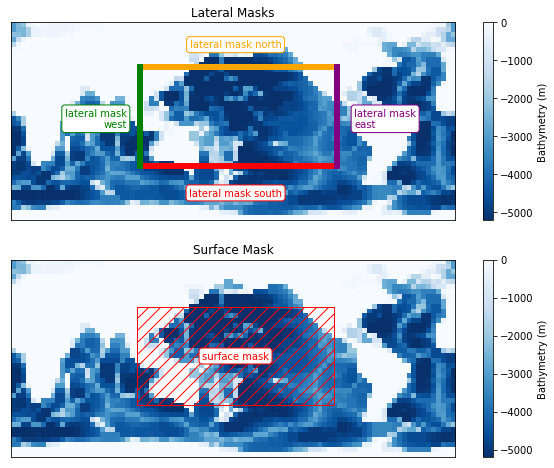

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# set the path to the input directory (UPDATE FOR YOUR SYSTEM)
input_dir = '../../../MITgcm_fresh/verification/global_with_exf/input_dv'

Nx = 90
Ny = 40

lateral_mask_names = ['lateral_mask_south','lateral_mask_north',
              'lateral_mask_west','lateral_mask_east']

# collect the mask files
lateral_mask_grids = []
for mask_name in lateral_mask_names:
    mask_file = os.path.join(input_dir,mask_name+'.bin')
    mask_grid = np.fromfile(mask_file,dtype='>f4')
    mask_grid = np.reshape(mask_grid,(Ny,Nx))
    lateral_mask_grids.append(mask_grid)
surface_mask_file = os.path.join(input_dir,'surface_mask.bin')
surface_mask_grid = np.fromfile(surface_mask_file,dtype='>f4')
surface_mask_grid = np.reshape(surface_mask_grid,(Ny,Nx))

# read the bathymetry
bathy_file = os.path.join(input_dir,'bathymetry.bin')
bathy_grid = np.fromfile(bathy_file,dtype='>f4')
bathy_grid = np.reshape(bathy_grid,(Ny,Nx))

# plot the masks on the bathymetry
fig = plt.figure(figsize=(10,8))
mask_plot_colors = ['red','orange','green','purple']

plt.subplot(2,1,1)
plt.title('Lateral Masks')
C = plt.imshow(bathy_grid,origin='lower',cmap='Blues_r')
cbar = plt.colorbar(C)
cbar.set_label('Bathymetry (m)')
for mn in range(len(lateral_mask_grids)):
    rows,cols = np.where(lateral_mask_grids[mn]!=0)
    for pt in range(len(rows)):
        rect = Rectangle((cols[pt],rows[pt]),1,1,color=mask_plot_colors[mn])
        plt.gca().add_patch(rect)
plt.text(45,5,'lateral mask south',color=mask_plot_colors[0],ha='center',va='center',
         bbox=dict(boxstyle="round",ec=mask_plot_colors[0],fc='w'))
plt.text(45,35,'lateral mask north',color=mask_plot_colors[1],ha='center',va='center',
         bbox=dict(boxstyle="round",ec=mask_plot_colors[1],fc='w'))
plt.text(23,20,'lateral mask\nwest',color=mask_plot_colors[2],ha='right',va='center',
         bbox=dict(boxstyle="round",ec=mask_plot_colors[2],fc='w'))
plt.text(69,20,'lateral mask\neast',color=mask_plot_colors[3],ha='left',va='center',
         bbox=dict(boxstyle="round",ec=mask_plot_colors[3],fc='w'))

plt.gca().set_xticks([])
plt.gca().set_yticks([])

plt.subplot(2,1,2)
plt.title('Surface Mask')
C = plt.imshow(bathy_grid,origin='lower',cmap='Blues_r')
cbar = plt.colorbar(C)
cbar.set_label('Bathymetry (m)')
rows,cols = np.where(surface_mask_grid!=0)
rect = Rectangle((np.min(cols),np.min(rows)),
                 np.max(cols)-np.min(cols),np.max(rows)-np.min(rows),
                 color='red',hatch='//',fill=False)
plt.gca().add_patch(rect)
plt.text(45,20,'surface mask',color='red',ha='center',va='center',
         bbox=dict(boxstyle="round",ec='red',fc='w'))

plt.gca().set_xticks([])
plt.gca().set_yticks([])

plt.show()

### 3. Build the model
For this experiement, we provide options for configuring the model with and without MPI. As the use of MPI will alter the format of the model output from the `diagnostics` package (which we will compare shortly) identify whether MPI is used in your configuration here:

In [7]:
usingMPI = True

Now, build the model following the general build sequence for your system

### 4. Run the model
With the model built, run it as you would on your system.